<a href="https://colab.research.google.com/github/kemaldoguoktay/hmgs-analiz/blob/main/hmgs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4509]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4510]:
df = pd.read_csv('hmgs.csv')

In [4511]:
df = df.drop(columns=["Zaman damgası"])

In [4512]:
df_copy = df.copy()

In [4513]:
df.head(3)

,Üniversite,Üniversite Ortalaması,Üniversitenin İngilizce Oranı,HMGS Notunuz,Eğitim Destek Durumu,Hangi Dershane (Varsa)?,Aylık Gelir Durumu,Konaklama Durumu,Sınava Ne Kadar Süre Hazırlandınız?,Günlük Ortalama Ders Çalışma Saatiniz,Sınavın soru kalitesi sizce nasıldı?
0,İstanbul Aydın Üniversitesi,"3,07",%25,80,Destek almadım,NaN,"41,000 ve üstü",Aile evi,1 aydan az,8,3
1,İstanbul Aydın Üniversitesi,2.00,%50,44,Destek almadım,NaN,"0-10,000 TL",Aile evi,1 aydan az,1,3
2,İstanbul Aydın üniversitesi,2.51,%25,76,Destek almadım,NaN,"10,001-20,000 TL",Aile evi,1 aydan az,13,2


In [4514]:
column_names = ["üni","üni_ort","üni_ing","hmgs","destek","dershane_adı","gelir","konak","süre","calisma","kalite"]
df.columns = column_names

In [4515]:
for i in range(len(df.üni)):
  df["üni"][i] = df["üni"][i].lower()

In [4516]:
for i in range(len(df.üni)):
  if "aydın" in df["üni"][i]:
    df["üni"][i] = "aydın üniversitesi"

In [4517]:
for i in range(len(df.üni)):
  if "i̇aü" in df["üni"][i]:
    df["üni"][i] = "aydın üniversitesi"

In [4518]:
for i in range(len(df.üni)):
  if "i̇nönü" in df["üni"][i]:
    df["üni"][i] = "inönü üniversitesi"

In [4519]:
for i in range(len(df.üni)):
  if "beykent" in df["üni"][i]:
    df["üni"][i] = "beykent üniversitesi"

In [4520]:
for i in range(len(df.üni)):
  if "dokuz eylül" in df["üni"][i]:
    df["üni"][i] = "dokuz eylül üniversitesi"

In [4521]:
for i in range(len(df.üni)):
  if "marmara" in df["üni"][i]:
    df["üni"][i] = "marmara üniversitesi"

In [4522]:
for i in range(len(df.üni)):
  if "uludağ" in df["üni"][i]:
    df["üni"][i] = "bursa uludağ üniversitesi"

In [4523]:
for i in range(len(df.üni)):
  if "ankara hukuk" in df["üni"][i]:
    df["üni"][i] = "ankara üniversitesi"

In [4524]:
for i in range(len(df.üni)):
  if "ankara üniversitesi" in df["üni"][i]:
    df["üni"][i] = "ankara üniversitesi"

In [4525]:
for i in range(len(df.üni)):
  if "süleyman demirel" in df["üni"][i]:
    df["üni"][i] = "süleyman demirel üniversitesi"

In [4526]:
for i in range(len(df.üni)):
  if "selçuk üniversitesi" in df["üni"][i]:
    df["üni"][i] = "selçuk üniversitesi"

In [4527]:
for i in range(len(df.üni)):
  if "sabahattin zaim" in df["üni"][i]:
    df["üni"][i] = "sabahattin zaim üniversitesi"

In [4528]:
for i in range(len(df.üni)):
  if "i̇stanbul üniversitesi hukuk fakültesi" in df["üni"][i]:
    df["üni"][i] = "istanbul üniversitesi"

In [4529]:
for i in range(len(df.üni)):
  if "i̇stanbul üniversitesi" in df["üni"][i]:
    df["üni"][i] = "istanbul üniversitesi"

In [4530]:
df.üni.value_counts().head(5)

,count
üni,
inönü üniversitesi,20
aydın üniversitesi,15
beykent üniversitesi,10
ankara üniversitesi,4
marmara üniversitesi,3


In [4531]:
df.head(2)

,üni,üni_ort,üni_ing,hmgs,destek,dershane_adı,gelir,konak,süre,calisma,kalite
0,aydın üniversitesi,"3,07",%25,80,Destek almadım,NaN,"41,000 ve üstü",Aile evi,1 aydan az,8,3
1,aydın üniversitesi,2.00,%50,44,Destek almadım,NaN,"0-10,000 TL",Aile evi,1 aydan az,1,3


In [4532]:
for i in range(len(df.üni_ort)):
  df.üni_ort[i] = df.üni_ort[i].replace(",",".")

In [4533]:
df.head(2)

,üni,üni_ort,üni_ing,hmgs,destek,dershane_adı,gelir,konak,süre,calisma,kalite
0,aydın üniversitesi,3.07,%25,80,Destek almadım,NaN,"41,000 ve üstü",Aile evi,1 aydan az,8,3
1,aydın üniversitesi,2.00,%50,44,Destek almadım,NaN,"0-10,000 TL",Aile evi,1 aydan az,1,3


In [4534]:
for i in range(len(df.üni_ort)):
  df.üni_ort[i] = float(df.üni_ort[i])

In [4535]:
for i in range(len(df.üni_ort)):
  if df.üni_ort[i]>4:
    print(df.üni_ort[i])
    df.üni_ort[i] = (df.üni_ort[i]/100)*4
    print("--"*30)
    print(df.üni_ort[i])

79.0
------------------------------------------------------------
3.16
79.0
------------------------------------------------------------
3.16
95.4
------------------------------------------------------------
3.8160000000000003


In [4536]:
df.head(3)

,üni,üni_ort,üni_ing,hmgs,destek,dershane_adı,gelir,konak,süre,calisma,kalite
0,aydın üniversitesi,3.07,%25,80,Destek almadım,NaN,"41,000 ve üstü",Aile evi,1 aydan az,8,3
1,aydın üniversitesi,2.0,%50,44,Destek almadım,NaN,"0-10,000 TL",Aile evi,1 aydan az,1,3
2,aydın üniversitesi,2.51,%25,76,Destek almadım,NaN,"10,001-20,000 TL",Aile evi,1 aydan az,13,2


In [4537]:
df.hmgs = df.hmgs.astype(int)

In [4538]:
df.head(2).hmgs

,hmgs
0,80
1,44


In [4539]:
df.head(2)

,üni,üni_ort,üni_ing,hmgs,destek,dershane_adı,gelir,konak,süre,calisma,kalite
0,aydın üniversitesi,3.07,%25,80,Destek almadım,NaN,"41,000 ve üstü",Aile evi,1 aydan az,8,3
1,aydın üniversitesi,2.0,%50,44,Destek almadım,NaN,"0-10,000 TL",Aile evi,1 aydan az,1,3


In [4540]:
df.dershane_adı.value_counts()

,count
dershane_adı,
Yetkiuzem,3
Yok,2
Hakimlik akademisi,2
Hukuki yeterlilik akademisi,1
Yetki,1
Yetki uzan,1
Themis,1
Yetki uzem,1
Yok,1


In [4541]:
df_copy = df.copy()

In [4542]:
df.dershane_adı = df.dershane_adı.astype(str)

In [4543]:
for i in range(len(df.dershane_adı)):
  df.dershane_adı[i] = df.dershane_adı[i].lower()

In [4544]:
df.dershane_adı.value_counts()

,count
dershane_adı,
nan,60
yetkiuzem,3
yok,2
hakimlik akademisi,2
hukuki yeterlilik akademisi,1
yetki,1
yetki uzan,1
themis,1
yetki uzem,1


In [4545]:
for i in range(len(df.dershane_adı)):
  if "yok" in df.dershane_adı[i]:
    df.dershane_adı[i] = "nan"

In [4546]:
for i in range(len(df.dershane_adı)):
  if "nan" in df.dershane_adı[i]:
    df.dershane_adı[i] = "yok"

In [4547]:
df.dershane_adı.value_counts()

,count
dershane_adı,
yok,63
yetkiuzem,3
hakimlik akademisi,2
hukuki yeterlilik akademisi,1
yetki,1
yetki uzan,1
themis,1
yetki uzem,1
monopol,1


In [4548]:
for i in range(len(df.dershane_adı)):
  if "yetki" in df.dershane_adı[i]:
    df.dershane_adı[i] = "yetki uzem"

In [4549]:
df.dershane_adı.value_counts()

,count
dershane_adı,
yok,63
yetki uzem,6
hakimlik akademisi,2
hukuki yeterlilik akademisi,1
themis,1
monopol,1


In [4550]:
df.head(3)

,üni,üni_ort,üni_ing,hmgs,destek,dershane_adı,gelir,konak,süre,calisma,kalite
0,aydın üniversitesi,3.07,%25,80,Destek almadım,yok,"41,000 ve üstü",Aile evi,1 aydan az,8,3
1,aydın üniversitesi,2.0,%50,44,Destek almadım,yok,"0-10,000 TL",Aile evi,1 aydan az,1,3
2,aydın üniversitesi,2.51,%25,76,Destek almadım,yok,"10,001-20,000 TL",Aile evi,1 aydan az,13,2


In [4551]:
df.calisma.value_counts()

,count
calisma,
4,10
6,10
5,7
3,6
7,6
1,5
2,3
8,3
9,2


In [4552]:
for i in range(len(df.calisma)):
  if "sınavdan önceki 4 gün çalıştım" in df.calisma[i]:
    print(df.iloc[i, :])

üni                         ankara üniversitesi
üni_ort                                    3.24
üni_ing                                      %0
hmgs                                         61
destek                           Destek almadım
dershane_adı                                yok
gelir                            41,000 ve üstü
konak                                  Aile evi
süre                                 1 aydan az
calisma         sınavdan önceki 4 gün çalıştım 
kalite                                        3
Name: 70, dtype: object


In [4553]:
df = df.drop(70)

In [4554]:
df.tail(5)

,üni,üni_ort,üni_ing,hmgs,destek,dershane_adı,gelir,konak,süre,calisma,kalite
68,gaziantep üniversitesi,2.7,%0,63,Destek almadım,yok,"41,000 ve üstü",Aile evi,1 aydan az,1,2
69,çankırı karatekin üniversitesi,2.74,%0,65,Destek almadım,yok,"0-10,000 TL",Aile evi,1 aydan az,5,3
71,aydın üniversitesi,3.35,%0,86,Destek almadım,yok,"10,001-20,000 TL",Aile evi,1 aydan az,7,3
72,lefke avrupa üniversitesi,2.1,%25,69,Dershane aldım,yetki uzem,"0-10,000 TL",Aile evi,1-3 ay,7-8,4
73,ankara üniversitesi,3.21,%0,77,Destek almadım,yok,"0-10,000 TL",Aile evi,1-3 ay,3,3


In [4555]:
df = df.reset_index(drop=True)

In [4556]:
for i in range(len(df.calisma)):
  if "saat" in df.calisma[i]:
    df.calisma[i] = df.calisma[i].replace("saat","")

In [4557]:
for i in range(len(df.calisma)):
  if "-" in df.calisma[i]:
    df.calisma[i] = df.calisma[i][0]

In [4558]:
for i in range(len(df.calisma)):
  if " " in df.calisma[i]:
    df.calisma[i] = df.calisma[i][0]

In [4559]:
df.calisma = df.calisma.astype(float)

In [4560]:
df.calisma.value_counts()

,count
calisma,
4.0,14
6.0,11
5.0,9
3.0,8
7.0,8
1.0,7
2.0,5
8.0,4
9.0,2


In [4561]:
for i in range(len(df.calisma)):
  if df.calisma[i] == 5.3:
    df.calisma[i] = 5.5

In [4562]:
df.shape

(73, 11)

In [4563]:
df.drop_duplicates(inplace=True)

In [4564]:
df.shape

(73, 11)

In [4565]:
df.isna().sum()

,0
üni,0
üni_ort,0
üni_ing,0
hmgs,0
destek,0
dershane_adı,0
gelir,0
konak,0
süre,0
calisma,0


In [4566]:
df['hmgs'] = pd.to_numeric(df['hmgs'], errors='coerce')
df['üni_ort'] = pd.to_numeric(df['üni_ort'], errors='coerce')
df['kalite'] = pd.to_numeric(df['kalite'], errors='coerce')
df['calisma'] = pd.to_numeric(df['calisma'], errors='coerce')

In [4567]:
for i in df.gelir.value_counts().keys():
  print(i,",")

0-10,000 TL ,
10,001-20,000 TL ,
41,000 ve üstü ,
20,001-30,000 TL ,
30,001-40,000 TL ,


In [4568]:
kategori_sırası = ["0-10,000 TL", "10,001-20,000 TL", "20,001-30,000 TL", "30,001-40,000 TL", "41,000 ve üstü"]
kategori_türü = pd.CategoricalDtype(categories=kategori_sırası, ordered=True)
df['gelir'] = df['gelir'].astype(kategori_türü)
df = df.sort_values(by='gelir', ascending=True)


In [4569]:
df.columns

Index(['üni', 'üni_ort', 'üni_ing', 'hmgs', 'destek', 'dershane_adı', 'gelir',
       'konak', 'süre', 'calisma', 'kalite'],
      dtype='object')

In [4570]:
df.head(3)

,üni,üni_ort,üni_ing,hmgs,destek,dershane_adı,gelir,konak,süre,calisma,kalite
72,ankara üniversitesi,3.21,%0,77,Destek almadım,yok,"0-10,000 TL",Aile evi,1-3 ay,3.0,3
61,marmara üniversitesi,3.40,%0,79,Dershane aldım,monopol,"0-10,000 TL",Aile evi,1 aydan az,9.0,2
28,inönü üniversitesi,3.24,%0,75,Destek almadım,yok,"0-10,000 TL",Aile evi,1-3 ay,7.0,1


In [4571]:
df.reset_index(drop=True, inplace=True)

In [4572]:
gecer = []

In [4573]:
for i in df["hmgs"]:
  if i > 70:
    gecer.append("Geçti")
  else:
    gecer.append("Geçemedi")

In [4574]:
df.hmgs[2]

75

In [4575]:
df["gecer"] = gecer

In [4576]:
df.head(10)

,üni,üni_ort,üni_ing,hmgs,destek,dershane_adı,gelir,konak,süre,calisma,kalite,gecer
0,ankara üniversitesi,3.21,%0,77,Destek almadım,yok,"0-10,000 TL",Aile evi,1-3 ay,3.0,3,Geçti
1,marmara üniversitesi,3.40,%0,79,Dershane aldım,monopol,"0-10,000 TL",Aile evi,1 aydan az,9.0,2,Geçti
2,inönü üniversitesi,3.24,%0,75,Destek almadım,yok,"0-10,000 TL",Aile evi,1-3 ay,7.0,1,Geçti
3,inönü üniversitesi,2.92,%0,65,Destek almadım,yok,"0-10,000 TL",Aile evi,1-3 ay,4.0,1,Geçemedi
4,inönü üniversitesi,3.10,%0,75,Özel ders aldım,yok,"0-10,000 TL",Aile evi,1-3 ay,6.0,4,Geçti
5,akdeniz üniversitesi,2.54,%0,72,Destek almadım,yok,"0-10,000 TL",Aile evi,1-3 ay,2.0,5,Geçti
6,marmara üniversitesi,2.70,%0,65,Destek almadım,yok,"0-10,000 TL",Aile evi,1 aydan az,3.0,2,Geçemedi
7,inönü üniversitesi,2.80,%0,59,Destek almadım,yok,"0-10,000 TL",Yurtta kalıyorum,1 aydan az,3.0,3,Geçemedi
8,lefke avrupa üniversitesi,2.10,%25,69,Dershane aldım,yetki uzem,"0-10,000 TL",Aile evi,1-3 ay,7.0,4,Geçemedi
9,selçuk üniversitesi,2.97,%0,78,Destek almadım,yok,"0-10,000 TL",Aile evi,1-3 ay,2.0,2,Geçti


In [4577]:
ort_yüksek_mi = []

In [4578]:
for i in df["üni_ort"]:
  if i > 3:
    ort_yüksek_mi.append("Evet")
  else:
    ort_yüksek_mi.append("Hayır")

In [4579]:
df["ort_yüksek_mi"] = ort_yüksek_mi

In [4580]:
df.head(3)

,üni,üni_ort,üni_ing,hmgs,destek,dershane_adı,gelir,konak,süre,calisma,kalite,gecer,ort_yüksek_mi
0,ankara üniversitesi,3.21,%0,77,Destek almadım,yok,"0-10,000 TL",Aile evi,1-3 ay,3.0,3,Geçti,Evet
1,marmara üniversitesi,3.40,%0,79,Dershane aldım,monopol,"0-10,000 TL",Aile evi,1 aydan az,9.0,2,Geçti,Evet
2,inönü üniversitesi,3.24,%0,75,Destek almadım,yok,"0-10,000 TL",Aile evi,1-3 ay,7.0,1,Geçti,Evet


In [4581]:
destek_var_mi = []

In [4582]:
for i in df["destek"]:
  if i=="Destek almadım":
    destek_var_mi.append("Hayır")
  else:
    destek_var_mi.append("Evet")

In [4583]:
df["destek_var_mi"] = destek_var_mi

In [4584]:
df.head(3)

,üni,üni_ort,üni_ing,hmgs,destek,dershane_adı,gelir,konak,süre,calisma,kalite,gecer,ort_yüksek_mi,destek_var_mi
0,ankara üniversitesi,3.21,%0,77,Destek almadım,yok,"0-10,000 TL",Aile evi,1-3 ay,3.0,3,Geçti,Evet,Hayır
1,marmara üniversitesi,3.40,%0,79,Dershane aldım,monopol,"0-10,000 TL",Aile evi,1 aydan az,9.0,2,Geçti,Evet,Evet
2,inönü üniversitesi,3.24,%0,75,Destek almadım,yok,"0-10,000 TL",Aile evi,1-3 ay,7.0,1,Geçti,Evet,Hayır


In [4585]:
üni_ing_mi = []

In [4586]:
for i in df["üni_ing"]:
  if int(i[1:])>24:
    üni_ing_mi.append("Evet")
  else:
    üni_ing_mi.append("Hayır")

In [4587]:
df["üni_ing_mi"] = üni_ing_mi

In [4588]:
df.head(3)

,üni,üni_ort,üni_ing,hmgs,destek,dershane_adı,gelir,konak,süre,calisma,kalite,gecer,ort_yüksek_mi,destek_var_mi,üni_ing_mi
0,ankara üniversitesi,3.21,%0,77,Destek almadım,yok,"0-10,000 TL",Aile evi,1-3 ay,3.0,3,Geçti,Evet,Hayır,Hayır
1,marmara üniversitesi,3.40,%0,79,Dershane aldım,monopol,"0-10,000 TL",Aile evi,1 aydan az,9.0,2,Geçti,Evet,Evet,Hayır
2,inönü üniversitesi,3.24,%0,75,Destek almadım,yok,"0-10,000 TL",Aile evi,1-3 ay,7.0,1,Geçti,Evet,Hayır,Hayır


In [4589]:
df.süre.value_counts()

,count
süre,
1-3 ay,41
1 aydan az,26
3-6 ay,5
6 aydan fazla,1


In [4590]:
birden_fazla_ay = []

In [4591]:
for i in df["süre"]:
  if i == "1 aydan az":
    birden_fazla_ay.append("Hayır")
  else:
    birden_fazla_ay.append("Evet")

In [4592]:
df["birden_fazla_ay"] = birden_fazla_ay

In [4593]:
df.head(3)

,üni,üni_ort,üni_ing,hmgs,destek,dershane_adı,gelir,konak,süre,calisma,kalite,gecer,ort_yüksek_mi,destek_var_mi,üni_ing_mi,birden_fazla_ay
0,ankara üniversitesi,3.21,%0,77,Destek almadım,yok,"0-10,000 TL",Aile evi,1-3 ay,3.0,3,Geçti,Evet,Hayır,Hayır,Evet
1,marmara üniversitesi,3.40,%0,79,Dershane aldım,monopol,"0-10,000 TL",Aile evi,1 aydan az,9.0,2,Geçti,Evet,Evet,Hayır,Hayır
2,inönü üniversitesi,3.24,%0,75,Destek almadım,yok,"0-10,000 TL",Aile evi,1-3 ay,7.0,1,Geçti,Evet,Hayır,Hayır,Evet


In [4594]:
kaliteli_mi = []

In [4595]:
for i in df["kalite"]:
  if i>3:
    kaliteli_mi.append("Evet")
  else:
    kaliteli_mi.append("Hayır")

In [4596]:
df["kaliteli mi"] = kaliteli_mi

In [4597]:
gelir_durumu = []

for i in df["gelir"]:
  if i == "0-10,000 TL":
    gelir_durumu.append("Düşük")
  elif i == "10,001-20,000 TL":
    gelir_durumu.append("Orta")
  elif i == "20,001-30,000 TL":
    gelir_durumu.append("Orta")
  elif i == "30,001-40,000 TL":
    gelir_durumu.append("Yüksek")
  else:
    gelir_durumu.append("Yüksek")

df["gelir_durumu"] = gelir_durumu

In [4598]:
df.üni.unique()

array(['ankara üniversitesi', 'marmara üniversitesi',
       'inönü üniversitesi', 'akdeniz üniversitesi ',
       'lefke avrupa üniversitesi', 'selçuk üniversitesi',
       'ufuk üniversitesi ', 'kırklareli üniversitesi',
       'i̇stanbul 29 mayıs üniversitesi ', 'sabahattin zaim üniversitesi',
       'aydın üniversitesi', 'beykent üniversitesi',
       'süleyman demirel üniversitesi', 'istanbul üniversitesi',
       'çankırı karatekin üniversitesi', 'dokuz eylül üniversitesi',
       'bursa uludağ üniversitesi', 'i̇stanbul okan üniversitesi',
       'koç üniversitesi ', 'gaziantep üniversitesi'], dtype=object)

In [4599]:
df_nerde = pd.read_csv("nerde.csv")

In [4600]:
df_nerde.head(4)

,Şehir,Üniversite,Tür,Geleneksel Kuruluş,Resmî Kuruluş
0,Adana,Adana Alparslan Türkeş Bilim ve Teknoloji Üniv...,Devlet,2011,NaN
1,NaN,Çukurova Üniversitesi,Devlet,1973,NaN
2,Adıyaman,Adıyaman Üniversitesi,Devlet,2006,NaN
3,Afyonkarahisar,Afyon Kocatepe Üniversitesi,Devlet,1992,NaN


In [4601]:
şehir = []

In [4602]:
for i in range(len(df_nerde['Şehir'])):
  if pd.notnull(df_nerde["Şehir"][i]):
    df_nerde.Şehir[i] = df_nerde.Şehir[i]
  else:
    df_nerde.Şehir[i] = df_nerde["Şehir"][i-1]

In [4603]:
df_nerde.Şehir.value_counts().head(3)

,count
Şehir,
İstanbul,57
Ankara,23
İzmir,9


In [4604]:
for i in range(len(df_nerde.Şehir)):
  df_nerde.Şehir[i] = df_nerde.Şehir[i].lower()
  df_nerde.Üniversite[i] = df_nerde.Üniversite[i].lower()

In [4605]:
df_nerde.Şehir.value_counts().head(3)

,count
Şehir,
i̇stanbul,57
ankara,23
i̇zmir,9


In [4606]:
df_nerde = df_nerde.drop(columns=["Resmî Kuruluş"])

In [4607]:
df_nerde = df_nerde.rename(columns={'Üniversite': 'üni'})

In [4608]:
import re

# Gizli karakterleri kaldırmak için kapsamlı bir temizlik
df_nerde['üni'] = df_nerde['üni'].str.replace(r'[\u200B-\u200D\uFEFF]', '', regex=True).str.strip()     # Zero-width karakterleri kaldırır
df_nerde['üni'] = df_nerde['üni'].str.replace(r'\s+', ' ', regex=True).str.strip()                      # Fazladan boşlukları tek boşluk yapar ve baştaki/sondaki boşlukları kaldırır
df_nerde['üni'] = df_nerde['üni'].str.replace(r'[\r\n\t]', '', regex=True).str.strip()                  # Satır sonu, yeni satır, tab karakterlerini kaldırır
df_nerde['üni'] = df_nerde['üni'].str.replace(r'[^\w\s]', '', regex=True).str.strip()                   # Özel karakterleri temizler
df['üni'] = df['üni'].str.replace(r'[\u200B-\u200D\uFEFF]', '', regex=True).str.strip()                 # Zero-width karakterleri kaldırır
df['üni'] = df['üni'].str.replace(r'\s+', ' ', regex=True).str.strip()                                  # Fazladan boşlukları tek boşluk yapar ve baştaki/sondaki boşlukları kaldırır
df['üni'] = df['üni'].str.replace(r'[\r\n\t]', '', regex=True).str.strip()                              # Satır sonu, yeni satır, tab karakterlerini kaldırır
df['üni'] = df['üni'].str.replace(r'[^\w\s]', '', regex=True).str.strip()                               # Özel karakterleri temizler

In [4609]:
for i in df["üni"]:
  if "inönü" in i:
    df['üni'] = df['üni'].str.replace(i, "inönü üniversitesi")

In [4610]:
df['üni'] = df['üni'].str.replace('sabahattin zaim üniversitesi', 'istanbul sabahattin zaim üniversitesi', regex=True)
df['üni'] = df['üni'].str.replace('beykent üniversitesi', 'istanbul beykent üniversitesi', regex=False)
df['üni'] = df['üni'].str.replace('aydın üniversitesi', 'istanbul aydın üniversitesi', regex=False)

In [4611]:
for i in df['üni'].unique():
    for e in df_nerde['üni'].unique():
        if e in i:
            df['üni'] = df['üni'].str.replace(i, e)

In [4612]:
df = pd.merge(df, df_nerde, how="left", on=["üni"])

In [4613]:
df[df["Şehir"].isna()]["üni"]

,üni
8,lefke avrupa üniversitesi


In [4614]:
df = df.drop(columns = ["Geleneksel Kuruluş"])

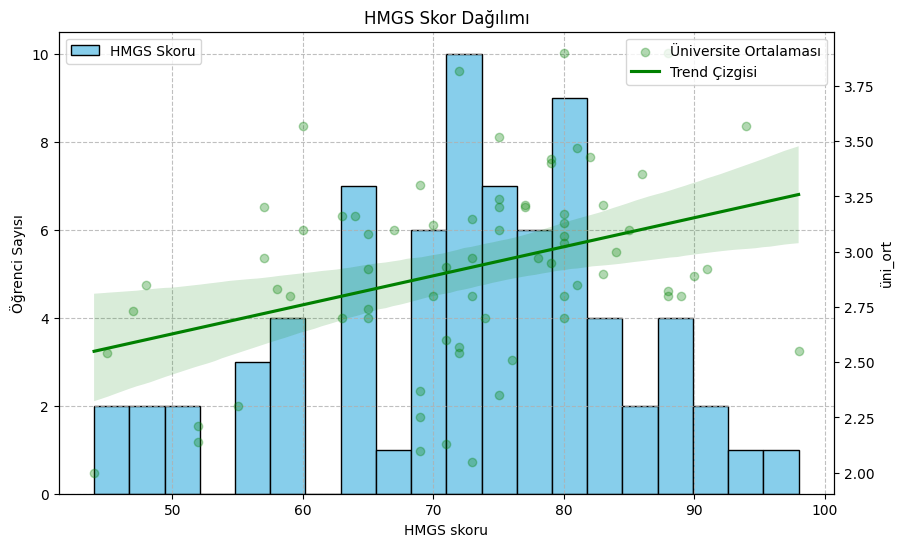

In [4615]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.hist(df['hmgs'], bins=20, edgecolor='black', color='skyblue', label='HMGS Skoru')
ax1.set_xlabel('HMGS skoru')
ax1.set_ylabel('Öğrenci Sayısı')
ax1.set_title('HMGS Skor Dağılımı')
ax1.grid(True, linestyle='--', alpha=0.8)

ax2 = ax1.twinx()
ax2.scatter(df['hmgs'], df['üni_ort'], color='green', label='Üniversite Ortalaması', alpha=0.3)
ax2.set_ylabel('Üniversite Ortalaması')

sns.regplot(x=df["hmgs"], y=df["üni_ort"], color="green", ax=ax2, scatter=False, label="Trend Çizgisi")

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

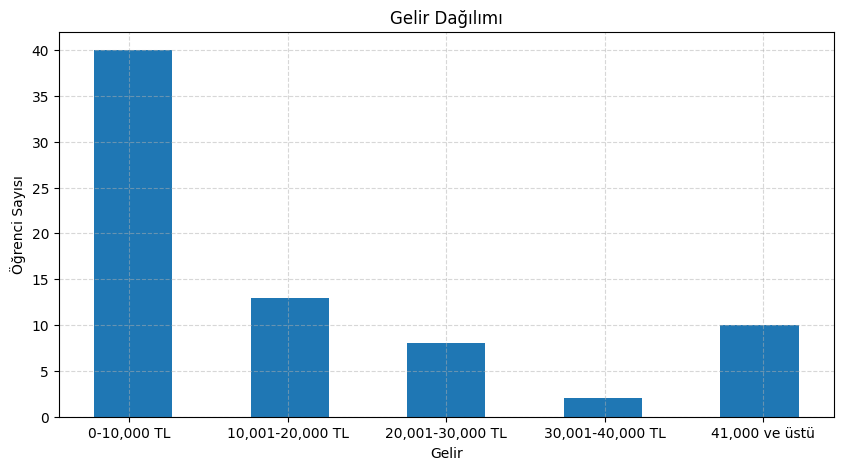

In [4616]:
df.gelir.hist(figsize=(10,5), bins=9)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Gelir')
plt.xticks(ticks=[0.2, 1.1, 2, 2.9, 3.8], ha='center')
plt.ylabel('Öğrenci Sayısı')
plt.title('Gelir Dağılımı')
plt.show()

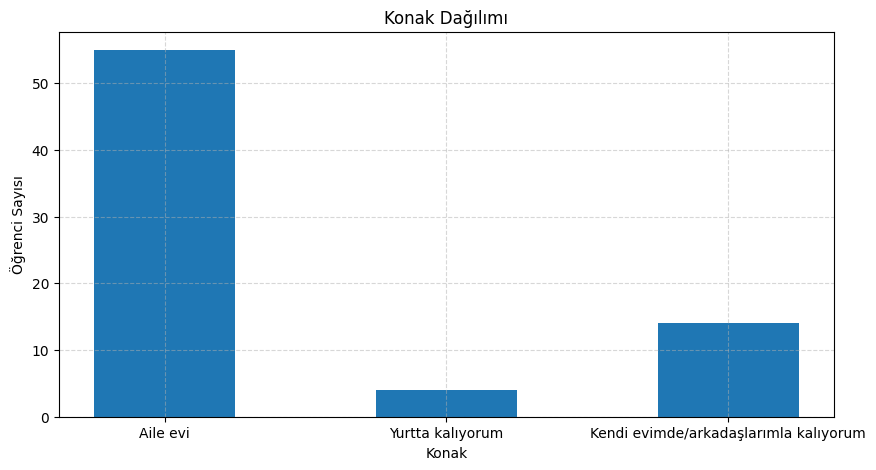

In [4617]:
df.konak.hist(figsize=(10,5), bins=5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Konak')
plt.xticks(ticks=[0.2, 1, 1.8], ha="center")
plt.ylabel('Öğrenci Sayısı')
plt.title('Konak Dağılımı')
plt.show()

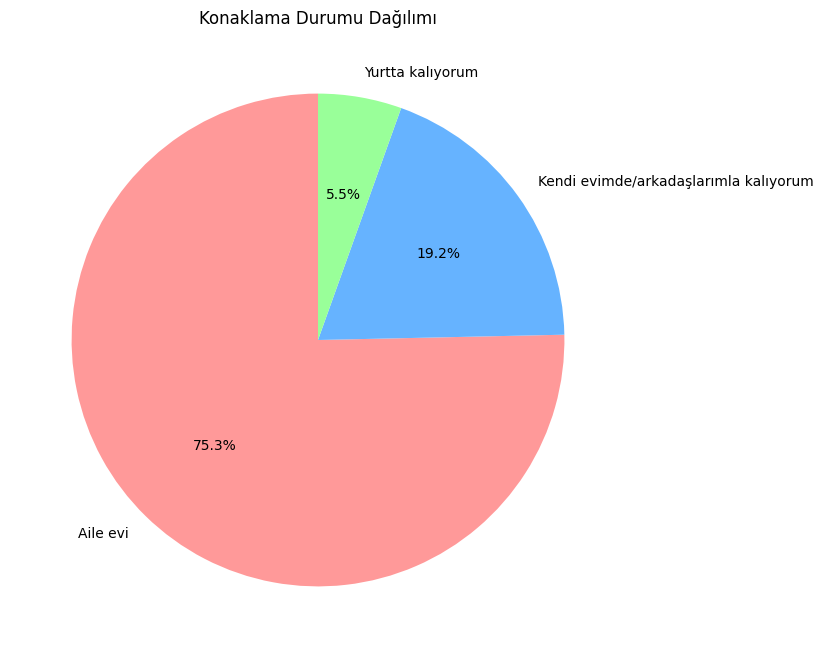

In [4618]:
df['konak'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Konaklama Durumu Dağılımı')
plt.ylabel('')
plt.show()

In [4619]:
failed_but_studied_long = len(df[(df["birden_fazla_ay"] == "Evet") & (df["gecer"] == "Geçemedi")])
hayır_gecemedi = len(df[(df["birden_fazla_ay"] == "Hayır") & (df["gecer"] == "Geçemedi")])
evet_gecti = len(df[(df["birden_fazla_ay"] == "Evet") & (df["gecer"] == "Geçti")])
hayır_gecti = len(df[(df["birden_fazla_ay"] == "Hayır") & (df["gecer"] == "Geçti")])

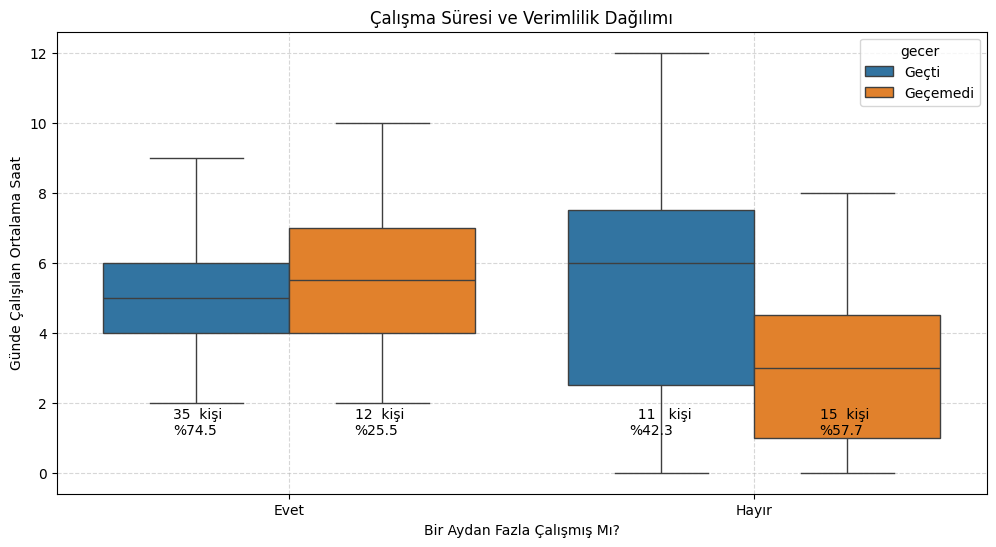

In [4620]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='birden_fazla_ay', y='calisma', hue="gecer")
plt.xlabel('Bir Aydan Fazla Çalışmış Mı?')
plt.ylabel('Günde Çalışılan Ortalama Saat')
plt.title('Çalışma Süresi ve Verimlilik Dağılımı')
plt.text(0.14,1.1,f"{failed_but_studied_long}  kişi\n%{round(failed_but_studied_long*100/(evet_gecti+failed_but_studied_long),1)}")
plt.text(1.14,1.1,f"{hayır_gecemedi}  kişi\n%{round(hayır_gecemedi*100/(hayır_gecemedi+hayır_gecti),1)}")
plt.text(-0.25,1.1,f"{evet_gecti}  kişi\n%{round(evet_gecti*100/(failed_but_studied_long+evet_gecti),1)}")
plt.text(0.73,1.1,f"  {hayır_gecti}   kişi\n%{round(hayır_gecti*100/(hayır_gecti+hayır_gecemedi),1)}")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

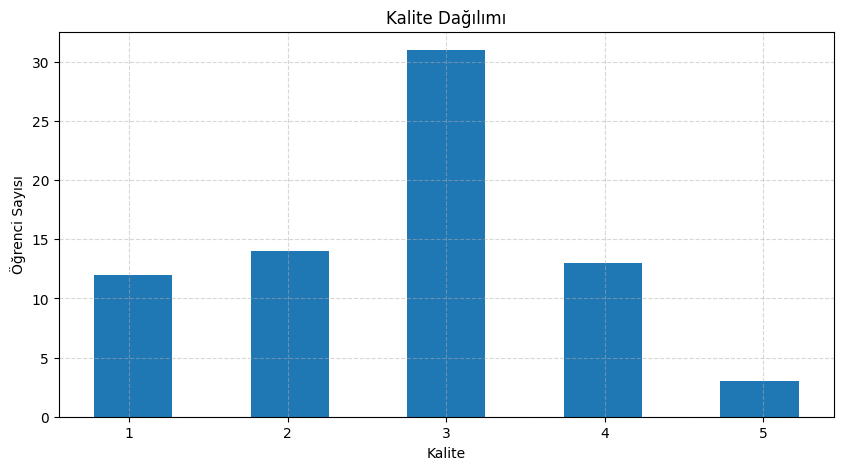

In [4621]:
df.kalite.hist(figsize=(10,5), bins=9)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Kalite')
plt.xticks(ticks=[1.2, 2.1, 3, 3.9, 4.8], labels=['1', '2', '3',"4","5"], ha='center')
plt.ylabel('Öğrenci Sayısı')
plt.title('Kalite Dağılımı')
plt.show()

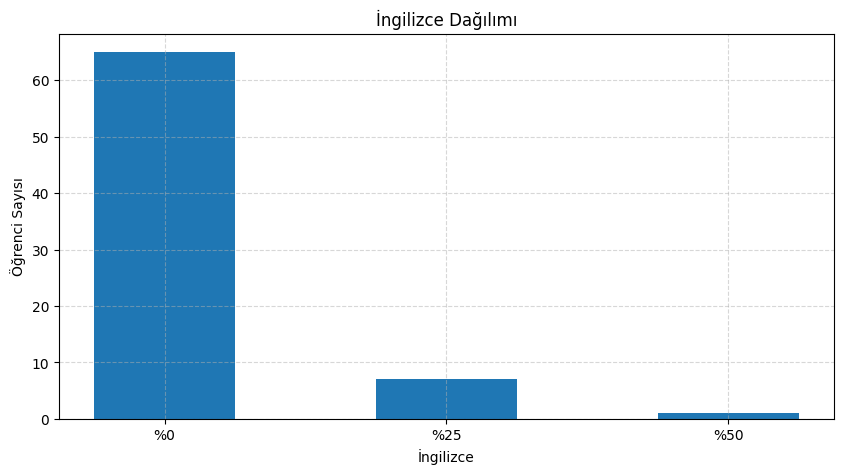

In [4622]:
df.üni_ing.hist(figsize=(10,5), bins=5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('İngilizce')
plt.ylabel('Öğrenci Sayısı')
plt.title('İngilizce Dağılımı')

plt.xticks(ticks=[0.2, 1, 1.8], labels=['%0', '%25', '%50'], ha='center')

plt.show()


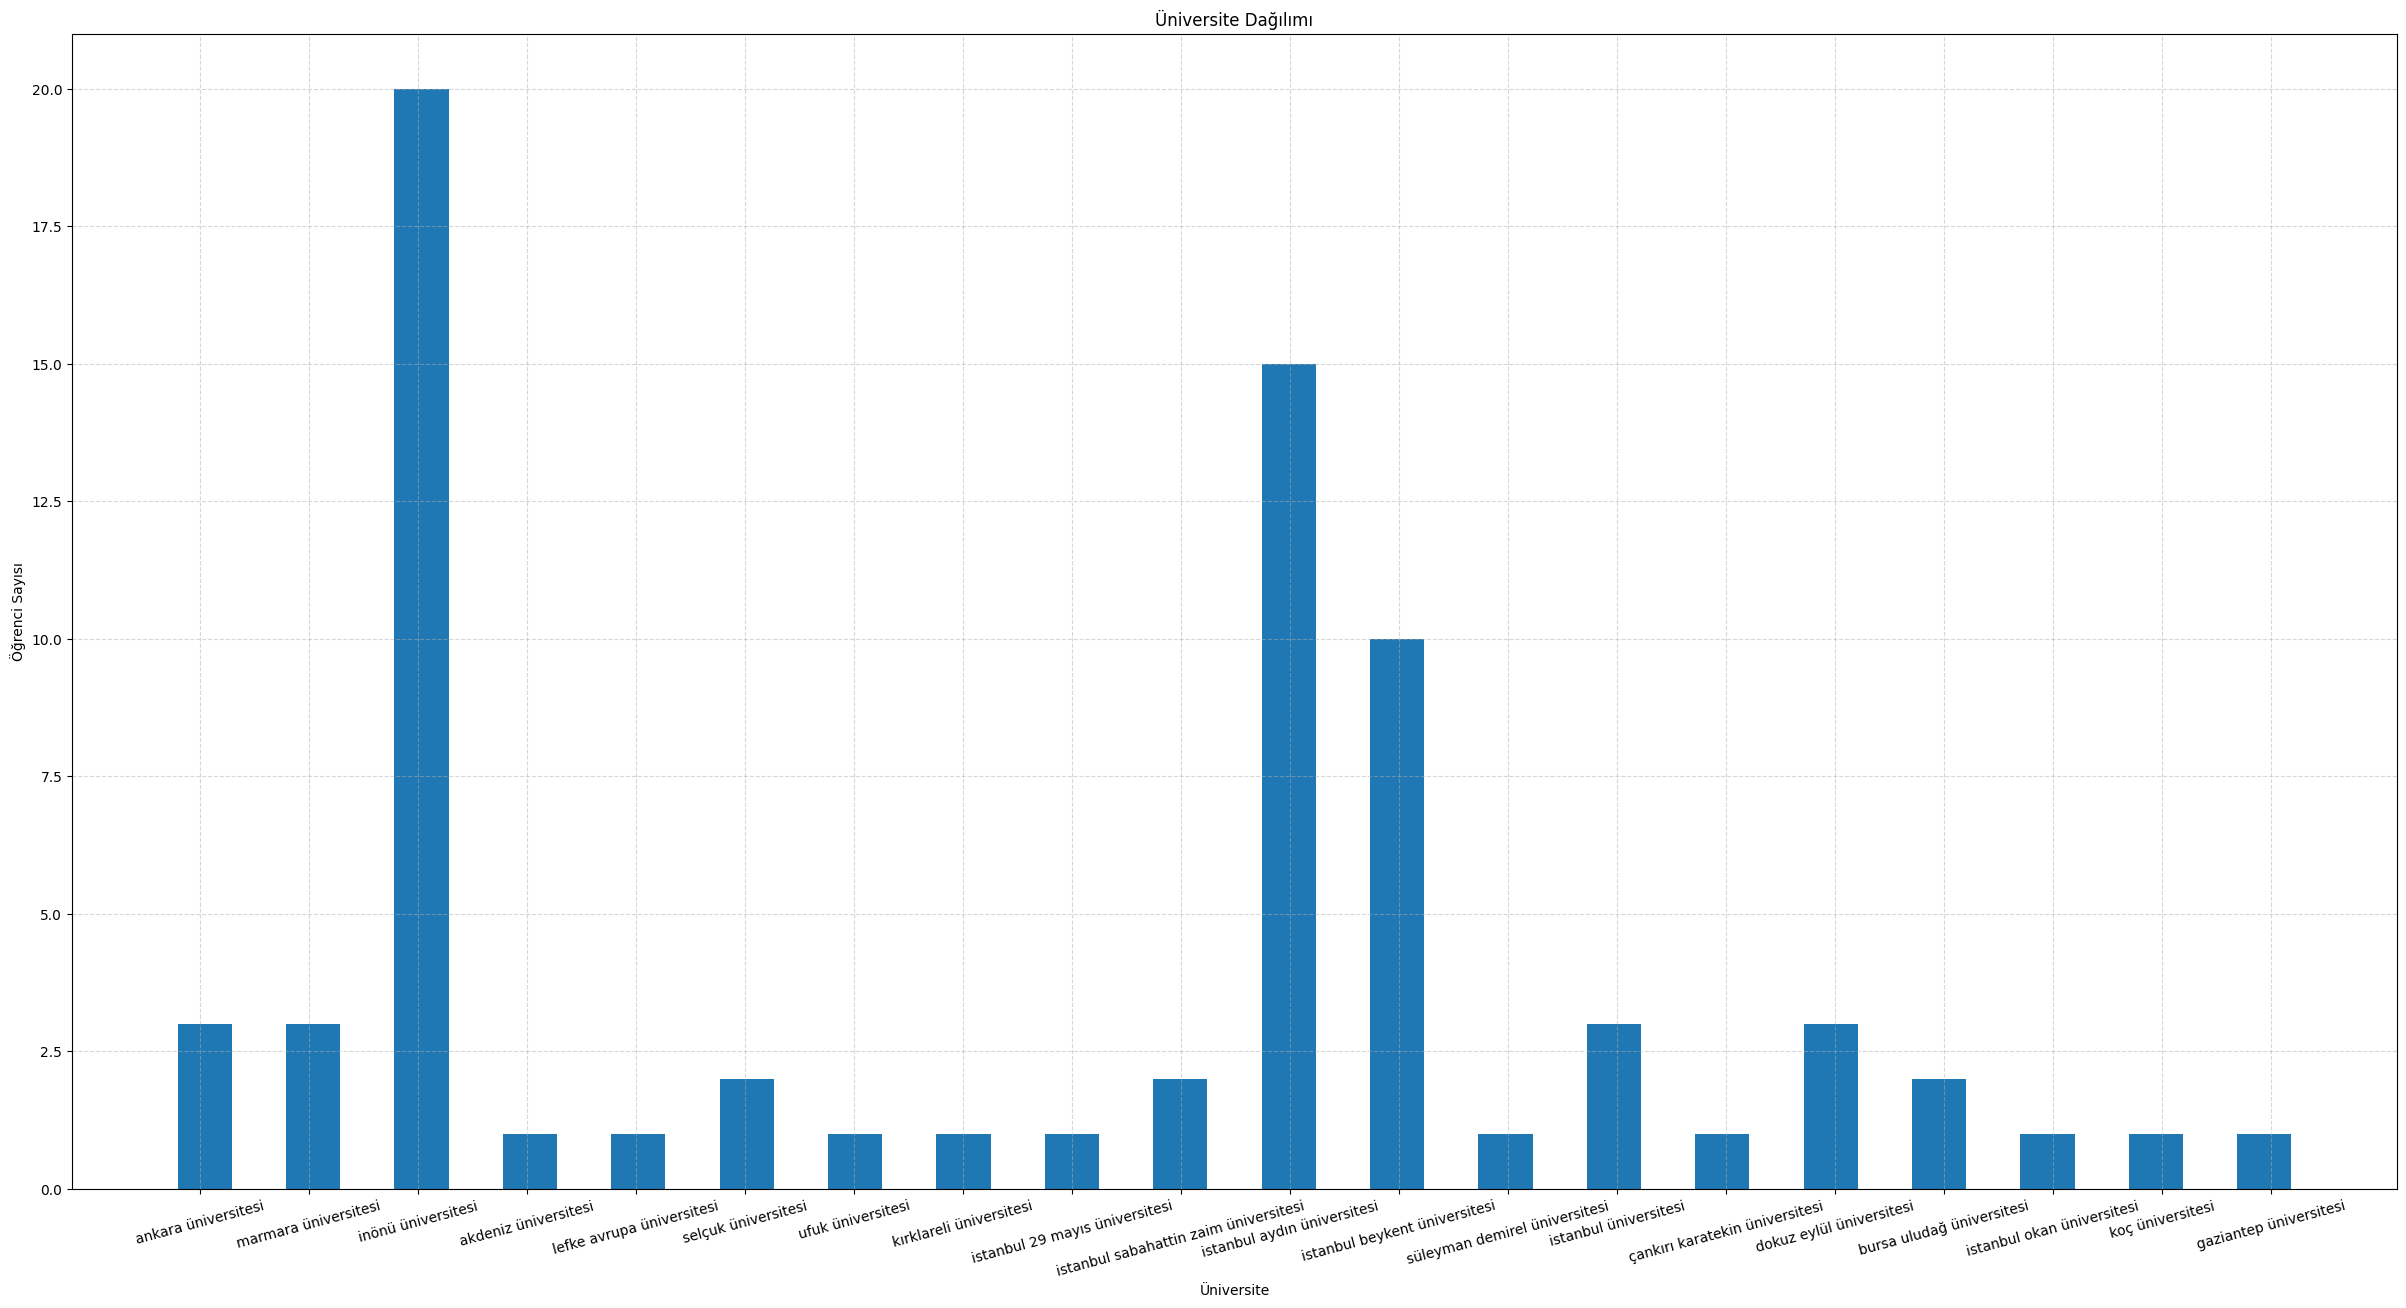

In [4623]:
df.üni.hist(figsize=(30,15), bins=39, rwidth=1),
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Üniversite')
plt.xticks(rotation=15)
plt.xticks(ticks=np.arange(0.2, 18.99, 0.98), ha='center')
plt.ylabel('Öğrenci Sayısı')
plt.title('Üniversite Dağılımı')
plt.show()

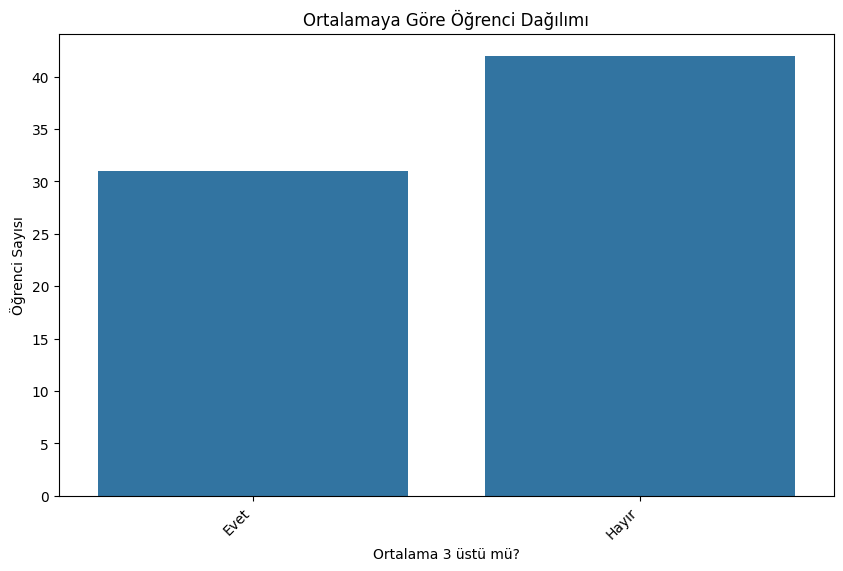

In [4624]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ort_yüksek_mi', data=df, order=df['ort_yüksek_mi'].value_counts(ascending = True).index)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Ortalama 3 üstü mü?')
plt.ylabel('Öğrenci Sayısı')
plt.title('Ortalamaya Göre Öğrenci Dağılımı')
plt.show()

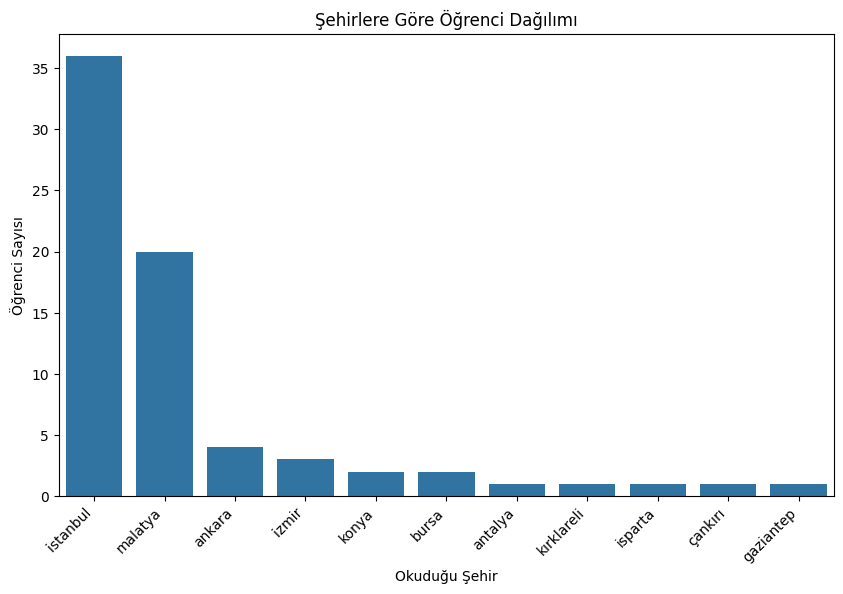

In [4625]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Şehir', data=df, order=df['Şehir'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Okuduğu Şehir')
plt.ylabel('Öğrenci Sayısı')
plt.title('Şehirlere Göre Öğrenci Dağılımı')
plt.show()

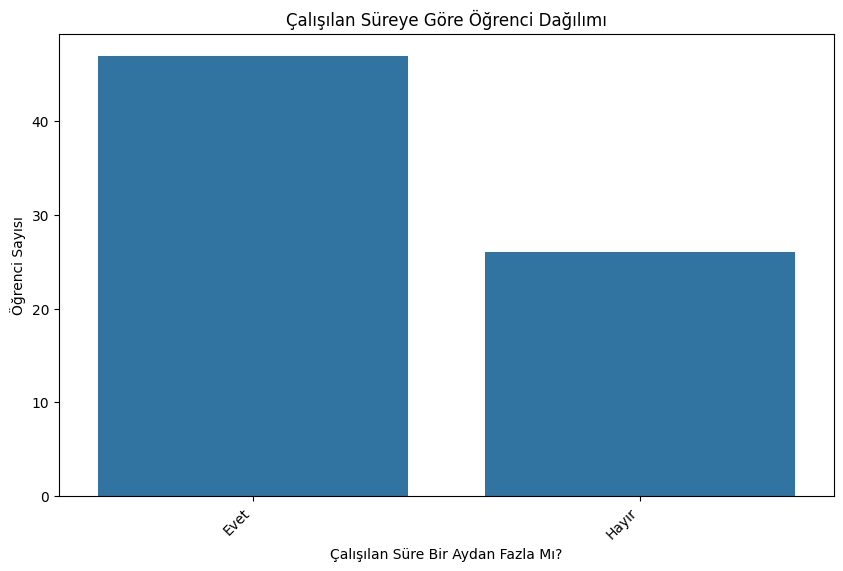

In [4626]:
plt.figure(figsize=(10, 6))
sns.countplot(x='birden_fazla_ay', data=df)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Çalışılan Süre Bir Aydan Fazla Mı?')
plt.ylabel('Öğrenci Sayısı')
plt.title('Çalışılan Süreye Göre Öğrenci Dağılımı')
plt.show()

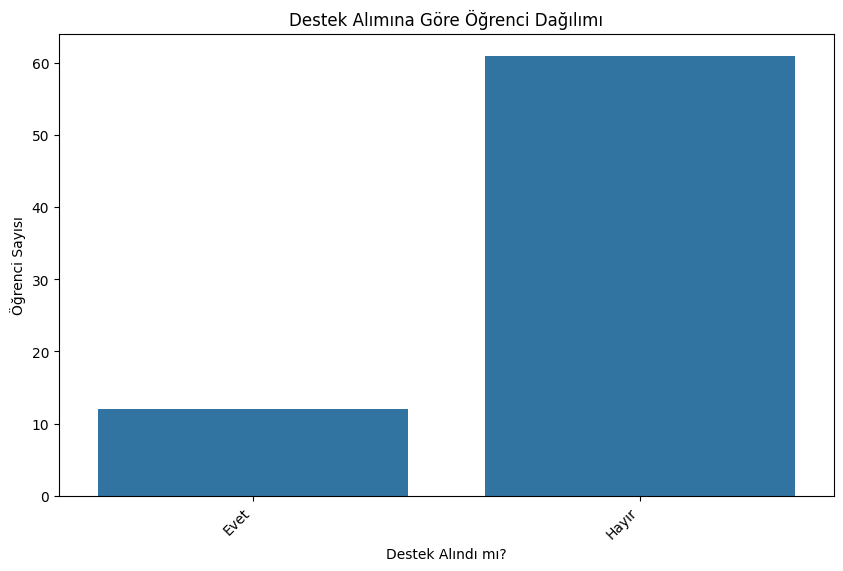

In [4627]:
plt.figure(figsize=(10, 6))
sns.countplot(x='destek_var_mi', data=df, order=df['destek_var_mi'].value_counts(ascending = True ).index)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Destek Alındı mı?')
plt.ylabel('Öğrenci Sayısı')
plt.title('Destek Alımına Göre Öğrenci Dağılımı')
plt.show()

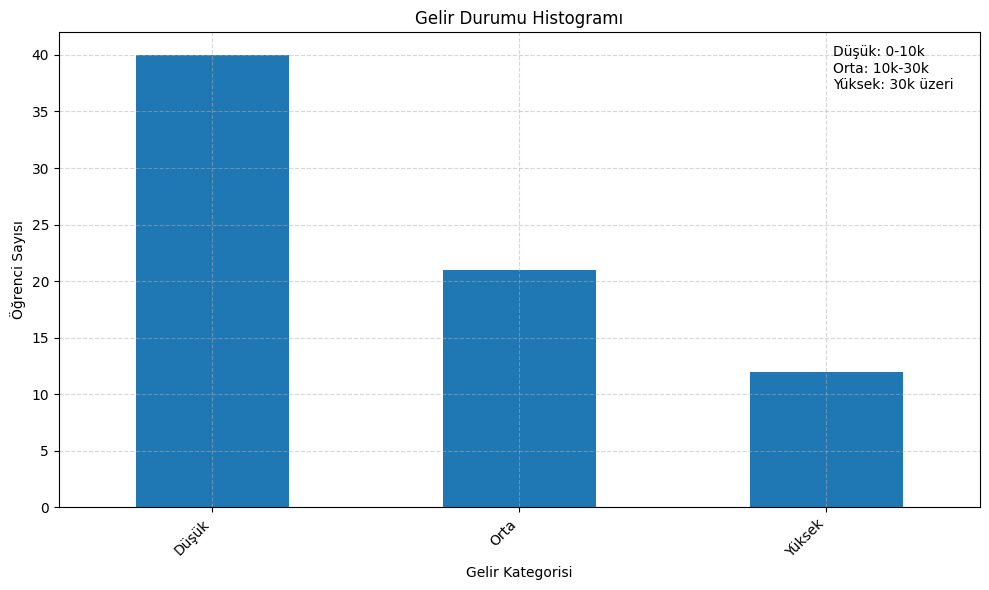

In [4628]:
plt.figure(figsize=(10, 6))
df['gelir_durumu'].value_counts().plot(kind='bar')
plt.xlabel('Gelir Kategorisi')
plt.ylabel('Öğrenci Sayısı')
plt.title('Gelir Durumu Histogramı')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.text(2.02,37,"Düşük: 0-10k\nOrta: 10k-30k\nYüksek: 30k üzeri")
plt.tight_layout()
plt.show()

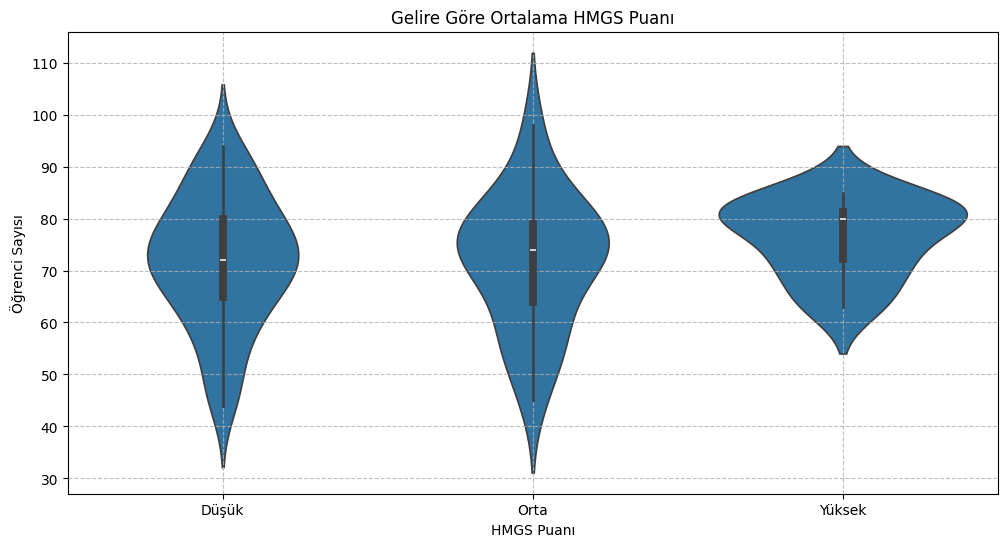

In [4629]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='gelir_durumu', y="hmgs")
plt.xlabel('HMGS Puanı')
plt.ylabel('Öğrenci Sayısı')
plt.grid(True, linestyle='--', alpha=0.8)
plt.title('Gelire Göre Ortalama HMGS Puanı')
plt.show()

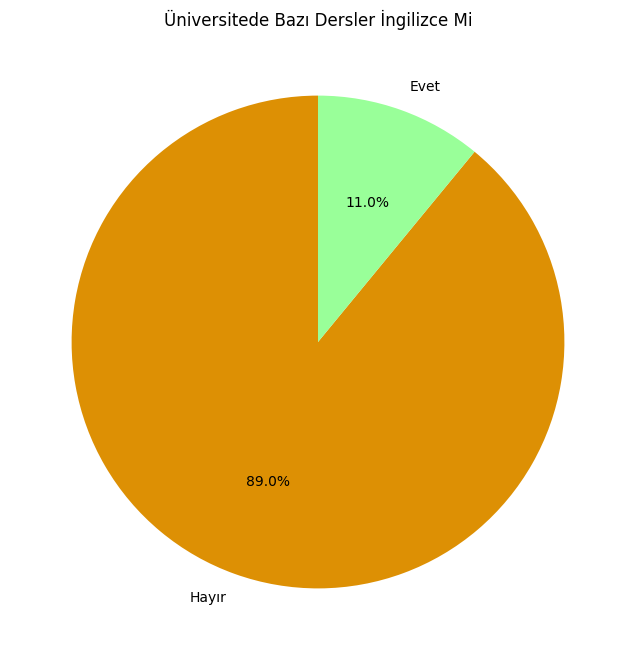

In [4630]:
df['üni_ing_mi'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90, colors=['#dd9004','#99ff99'])
plt.title('Üniversitede Bazı Dersler İngilizce Mi')
plt.ylabel('')
plt.show()

<Figure size 4000x1000 with 0 Axes>

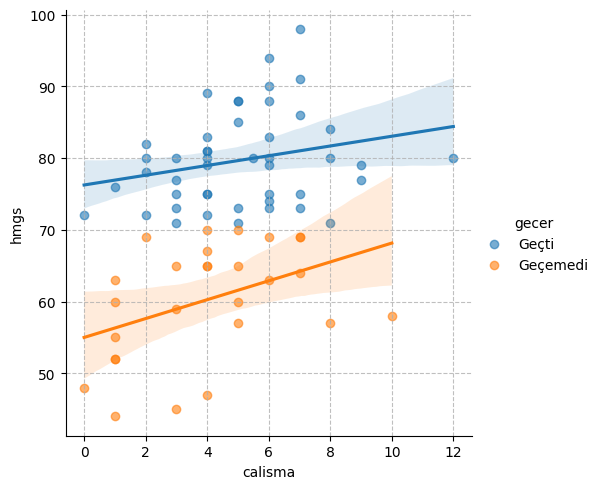

In [4631]:
plt.figure(figsize=(40, 10))
sns.lmplot(data=df, x="calisma", y="hmgs", hue="gecer", scatter_kws={"alpha": 0.6})
plt.grid(True, linestyle='--', alpha=0.8)
plt.show()

<Figure size 4000x1000 with 0 Axes>

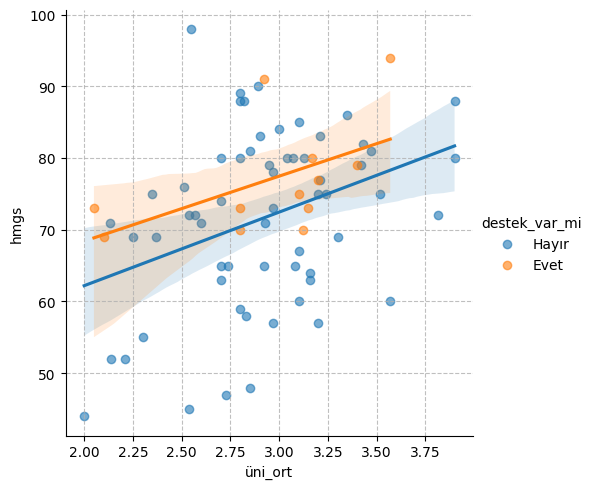

In [4632]:
# Topladığım datada sınav zamanı dershaneye giden az kişi de olsa
# üniversite ortalaması ve destek alınıp alınmaması sınavda alınan puanın yükselmesine Ciddi anlamda etki ediyor.

plt.figure(figsize=(40, 10))
sns.lmplot(data=df, x="üni_ort", y="hmgs", hue="destek_var_mi", scatter_kws={"alpha": 0.6})
plt.grid(True, linestyle='--', alpha=0.8)
plt.show()

In [4633]:
desyok_gecti = len(df[(df["destek_var_mi"] == "Hayır") & (df["gecer"] == "Geçti")])
desyok_gecemedi = len(df[(df["destek_var_mi"] == "Hayır") & (df["gecer"] == "Geçemedi")])
desvar_gecti = len(df[(df["destek_var_mi"] == "Evet") & (df["gecer"] == "Geçti")])
desvar_gecemedi = len(df[(df["destek_var_mi"] == "Evet") & (df["gecer"] == "Geçemedi")])

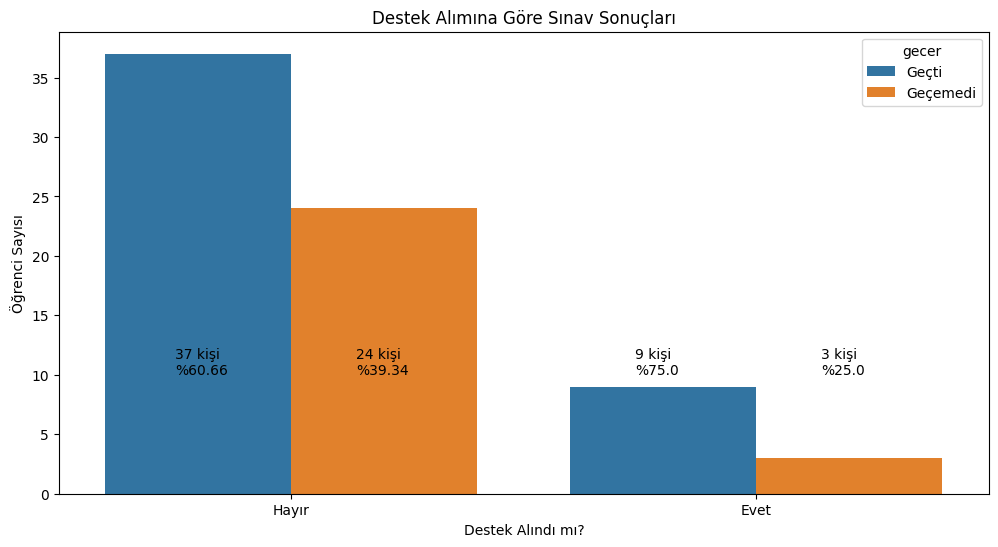

In [4634]:
plt.figure(figsize=(12, 6))
sns.countplot(x='destek_var_mi', hue='gecer', data=df)
plt.xlabel('Destek Alındı mı?')
plt.ylabel('Öğrenci Sayısı')
plt.text(-0.25,10,f"{desyok_gecti} kişi\n%{round(desyok_gecti*100/(desyok_gecemedi+desyok_gecti),2)}")
plt.text(0.14,10,f"{desyok_gecemedi} kişi\n%{round(desyok_gecemedi*100/(desyok_gecti+desyok_gecemedi),2)}")
plt.text(0.74,10,f"{desvar_gecti} kişi\n%{round(desvar_gecti*100/(desvar_gecti+desvar_gecemedi),2)}")
plt.text(1.14,10,f"{desvar_gecemedi} kişi\n%{round(desvar_gecemedi*100/(desvar_gecemedi+desvar_gecti),2)}")
plt.title('Destek Alımına Göre Sınav Sonuçları')
plt.show()

<Figure size 4000x1000 with 0 Axes>

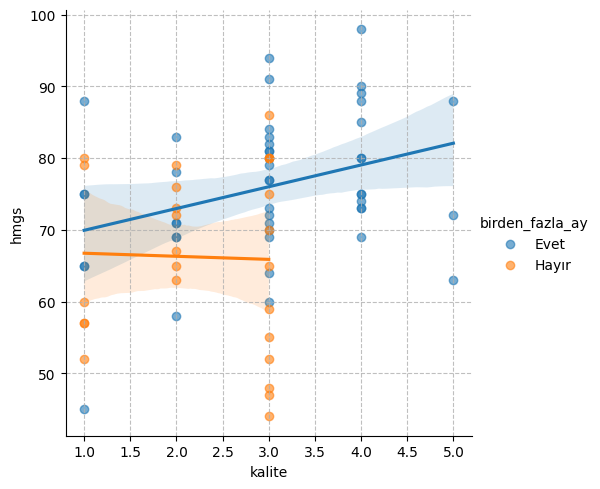

In [4635]:
# Bir aydan fazla çalışanlar hmgs notu arttıkça sınavın kaliteli olduğunu düşünme eğiliminde
# Bir aydan az çalışanları ise hmgs notları etkilemiyor her türlü sınavın kalitesiz olduğunu düşünüyorlar

plt.figure(figsize=(40, 10))
sns.lmplot(data=df, x="kalite", y="hmgs", hue="birden_fazla_ay", scatter_kws={"alpha": 0.6})
plt.grid(True, linestyle='--', alpha=0.8)
plt.show()

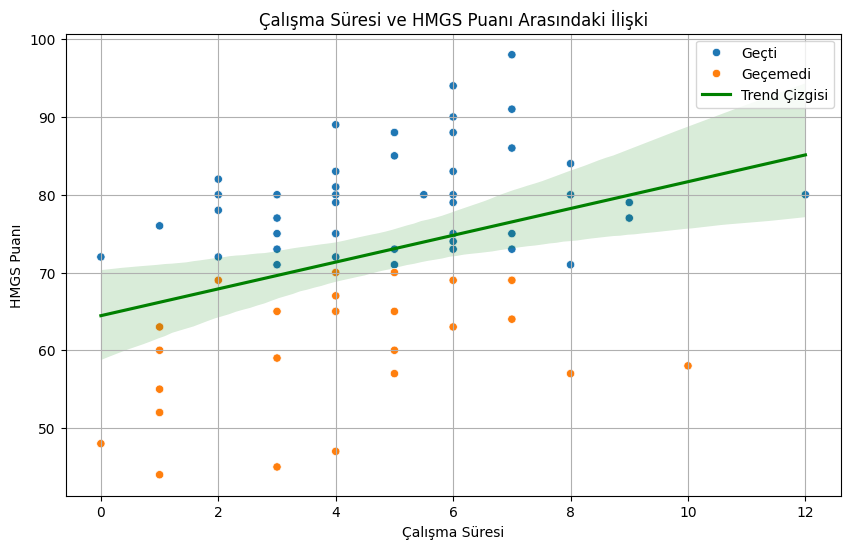

In [4636]:
# Sınava günlük ortalama kaç saat çalıştığın çok fazla etkiliyor. Sınava günde 3 saatten fazla çalışanlar 70 notunu geçme eğiliminde
# bu da sınavı geçilebilir kılıyor.

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='calisma', y='hmgs', hue='gecer')
sns.regplot(data=df, x='calisma', y='hmgs', scatter=False, color='green', label="Trend Çizgisi")
plt.xlabel('Çalışma Süresi')
plt.ylabel('HMGS Puanı')
plt.title('Çalışma Süresi ve HMGS Puanı Arasındaki İlişki')
plt.legend()
plt.grid(True)
plt.show()

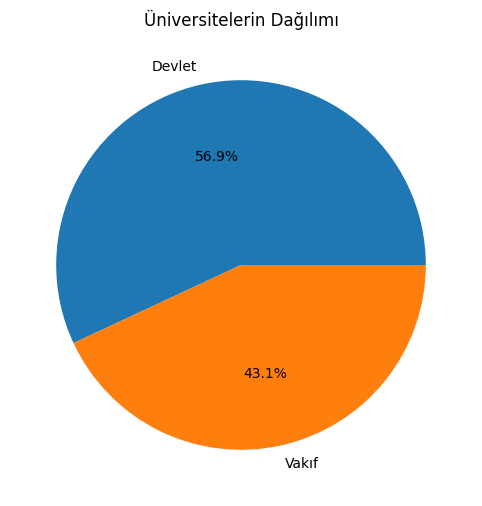

In [4637]:
plt.figure(figsize=(8, 6))
df['Tür'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Üniversitelerin Dağılımı')
plt.ylabel('')
plt.show()

In [4638]:
gelir_int = []

for i in df["gelir"]:
  if i == "0-10,000 TL":
    gelir_int.append(1)
  elif i == "10,001-20,000 TL":
    gelir_int.append(2)
  elif i == "20,001-30,000 TL":
    gelir_int.append(3)
  elif i == "30,001-40,000 TL":
    gelir_int.append(4)
  else:
    gelir_int.append(5)

df["gelir_int"] = gelir_int

In [4639]:
df[df["Tür"].isna()]

,üni,üni_ort,üni_ing,hmgs,destek,dershane_adı,gelir,konak,süre,calisma,...,gecer,ort_yüksek_mi,destek_var_mi,üni_ing_mi,birden_fazla_ay,kaliteli mi,gelir_durumu,Şehir,Tür,gelir_int
8,lefke avrupa üniversitesi,2.1,%25,69,Dershane aldım,yetki uzem,"0-10,000 TL",Aile evi,1-3 ay,7.0,...,Geçemedi,Hayır,Evet,Evet,Evet,Evet,Düşük,NaN,NaN,1


In [4640]:
for i in range(len(df.üni)):
    if "lefke avrupa üniversitesi" in df["üni"][i]:
        df["Tür"][i] = "Vakıf"

In [4641]:
tür_int = []

for i in df["Tür"]:
  if i == "Devlet":
    tür_int.append(1)
  elif i == "Vakıf":
    tür_int.append(2)

df["tür_int"] = tür_int

In [4642]:
df["konak"].unique()

array(['Aile evi', 'Yurtta kalıyorum',
       'Kendi evimde/arkadaşlarımla kalıyorum'], dtype=object)

In [4643]:
konak_int = []

for i in df["konak"]:
  if i == "Aile evi":
    konak_int.append(1)
  elif i == 'Yurtta kalıyorum':
    konak_int.append(2)
  elif i == 'Kendi evimde/arkadaşlarımla kalıyorum':
    konak_int.append(3)

df["konak_int"] = konak_int

In [4644]:
birden_fazla_int = []

for i in df["birden_fazla_ay"]:
  if i == "Hayır":
    birden_fazla_int.append(1)
  else:
    birden_fazla_int.append(2)

df["birden_fazla_int"] = birden_fazla_int

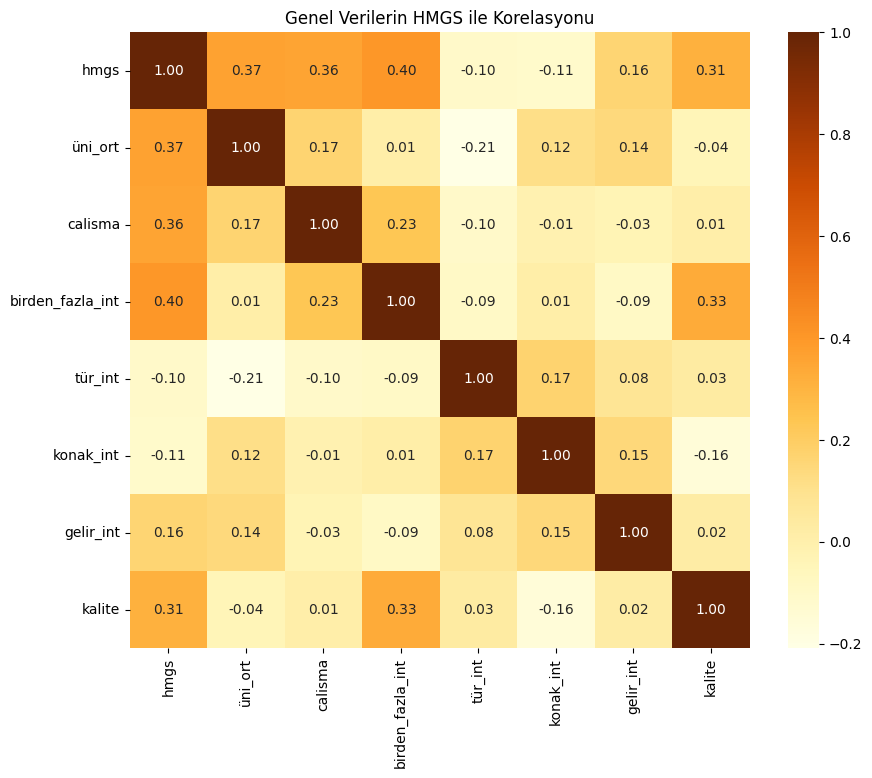

In [4645]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[["hmgs",'üni_ort','calisma',"birden_fazla_int","tür_int", "konak_int","gelir_int","kalite"]].corr(), annot=True, cmap='YlOrBr', fmt=".2f")
plt.title('Genel Verilerin HMGS ile Korelasyonu')
plt.show()

In [4646]:
for i in df.columns:
  print(f"Sütun adı: {df[i].name}" "\n------------------", type(df[i][0]))

Sütun adı: üni
------------------ <class 'str'>
Sütun adı: üni_ort
------------------ <class 'numpy.float64'>
Sütun adı: üni_ing
------------------ <class 'str'>
Sütun adı: hmgs
------------------ <class 'numpy.int64'>
Sütun adı: destek
------------------ <class 'str'>
Sütun adı: dershane_adı
------------------ <class 'str'>
Sütun adı: gelir
------------------ <class 'str'>
Sütun adı: konak
------------------ <class 'str'>
Sütun adı: süre
------------------ <class 'str'>
Sütun adı: calisma
------------------ <class 'numpy.float64'>
Sütun adı: kalite
------------------ <class 'numpy.int64'>
Sütun adı: gecer
------------------ <class 'str'>
Sütun adı: ort_yüksek_mi
------------------ <class 'str'>
Sütun adı: destek_var_mi
------------------ <class 'str'>
Sütun adı: üni_ing_mi
------------------ <class 'str'>
Sütun adı: birden_fazla_ay
------------------ <class 'str'>
Sütun adı: kaliteli mi
------------------ <class 'str'>
Sütun adı: gelir_durumu
------------------ <class 'str'>
Sütun adı